IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      97.0 -0.054048   0.016280   -0.534119   0.138438          0.0   
1       2.0 -0.106199   0.039737   -0.411822   0.225616         50.0   
2      61.0 -0.038259   0.020301   -0.267071   0.147361         90.0   
3      29.0  0.019747   0.048252    2.945934   0.220261         81.0   
4      75.0 -0.040308   0.020004   -0.258574   0.146906        129.0   
...     ...       ...        ...         ...        ...          ...   
1344   11.0 -0.055662   0.028524   -1.026696   0.177605          0.0   
1345    8.0 -0.043115   0.019466   -0.892529   0.145845         75.0   
1346    4.0 -0.061014   0.005932    0.031922   0.098172          0.0   
1347   52.0 -0.069557   0.010365    0.941655   0.123198          0.0   
1348   78.0 -0.011938   0.057752    1.891246   0.240333         88.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0           123.0    3.265261    2.587508  0.011548  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.054048   0.016280   -0.534119   0.138438          0.0        123.0   
1    -0.106199   0.039737   -0.411822   0.225616         50.0         66.0   
2    -0.038259   0.020301   -0.267071   0.147361         90.0        118.0   
3     0.019747   0.048252    2.945934   0.220261         81.0         80.0   
4    -0.040308   0.020004   -0.258574   0.146906        129.0         97.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.055662   0.028524   -1.026696   0.177605          0.0        101.0   
1345 -0.043115   0.019466   -0.892529   0.145845         75.0         55.0   
1346 -0.061014   0.005932    0.031922   0.098172          0.0         96.0   
1347 -0.069557   0.010365    0.941655   0.123198          0.0        123.0   
1348 -0.011938   0.057752    1.891246   0.240333         88.0         87.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
scale = MinMaxScaler()
df_1[df_1.columns.difference(['Guasto'])] = scale.fit_transform(df_1[df_1.columns.difference(['Guasto'])])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.504210   0.189076    0.173951   0.357394     0.000000     0.836735   
1     0.203668   0.614739    0.194872   0.869022     0.344828     0.448980   
2     0.595202   0.262034    0.219633   0.409759     0.620690     0.802721   
3     0.929490   0.769260    0.769254   0.837596     0.558621     0.544218   
4     0.583394   0.256642    0.221087   0.407089     0.889655     0.659864   
...        ...        ...         ...        ...          ...          ...   
1344  0.494911   0.411264    0.089691   0.587258     0.000000     0.687075   
1345  0.567219   0.246890    0.112641   0.400864     0.517241     0.374150   
1346  0.464068   0.001284    0.270779   0.121078     0.000000     0.653061   
1347  0.414836   0.081738    0.426399   0.267951     0.000000     0.836735   
1348  0.746887   0.941653    0.588838   0.955392     0.606897     0.591837   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [8]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [9]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340   0.44608   0.107367     0.33747   0.284047          0.0      0.55102   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    0.315396     0.25957  0.560644   0.090499  ...          0.301399   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         0.316503          0.919456            0.40321          0.372174   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340            0.801724            0.801724           0.171592   

     amp2(Curr(ESC_5))  Guasto  
340           0.252721       0  

[1 rows x 167 columns]


In [10]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [11]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.504210   0.189076    0.173951   0.357394     0.000000     0.836735   
1     0.203668   0.614739    0.194872   0.869022     0.344828     0.448980   
2     0.595202   0.262034    0.219633   0.409759     0.620690     0.802721   
3     0.929490   0.769260    0.769254   0.837596     0.558621     0.544218   
4     0.583394   0.256642    0.221087   0.407089     0.889655     0.659864   
...        ...        ...         ...        ...          ...          ...   
1344  0.494911   0.411264    0.089691   0.587258     0.000000     0.687075   
1345  0.567219   0.246890    0.112641   0.400864     0.517241     0.374150   
1346  0.464068   0.001284    0.270779   0.121078     0.000000     0.653061   
1347  0.414836   0.081738    0.426399   0.267951     0.000000     0.836735   
1348  0.746887   0.941653    0.588838   0.955392     0.606897     0.591837   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [12]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [13]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.504210   0.189076    0.173951   0.357394     0.000000     0.836735   
1     0.203668   0.614739    0.194872   0.869022     0.344828     0.448980   
2     0.595202   0.262034    0.219633   0.409759     0.620690     0.802721   
3     0.929490   0.769260    0.769254   0.837596     0.558621     0.544218   
4     0.583394   0.256642    0.221087   0.407089     0.889655     0.659864   
...        ...        ...         ...        ...          ...          ...   
1618  0.717704   0.009955    0.205877   0.024636     0.571007     0.575478   
1619  0.716247   0.010339    0.204899   0.025707     0.564462     0.601308   
1620  0.862862   0.031772    0.184683   0.058504     0.555484     0.544849   
1621  0.181658   0.617217    0.189892   0.881513     0.331034     0.455782   
1622  0.694507   0.071075    0.698214   0.137438     0.389392     0.519700   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x0000020F56D11120>)
[ True False False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [15]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.265288
28         freq1(AccX)  3.474066
12         freq1(GyrY)  3.080094
93   freq2(RPM(ESC_1))  2.836703
92   freq1(RPM(ESC_1))  2.835359
11           RMS(GyrY)  2.802726
9            var(GyrY)  2.651653
153   kurt(RPM(ESC_5))  2.540049
14          amp1(GyrY)  2.428152
159   var(Curr(ESC_5))  2.083542
104     <>(RPM(ESC_2))  1.965380
8             <>(GyrY)  1.780634
78    amp1(RPM(ESC_0))  1.755957
107    RMS(RPM(ESC_2))  1.700170
152    var(RPM(ESC_5))  1.684483
22          amp1(GyrZ)  1.499553
32            <>(AccY)  1.441474
62         amp1(Pitch)  1.268617
80     <>(Curr(ESC_0))  1.123440
17           var(GyrZ)  1.071405
19           RMS(GyrZ)  1.065332
76   freq1(RPM(ESC_0))  0.993262
30          amp1(AccX)  0.991154
4          freq1(GyrX)  0.945043
57          var(Pitch)  0.903616
77   freq2(RPM(ESC_0))  0.832446
15          amp2(GyrY)  0.733465
83    RMS(Curr(ESC_0))  0.714084
156   amp1(RPM(ESC_5))  0.656486
97    var(

In [16]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[1, 2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [17]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
0     0.504210     0.000000  0.534179   0.578308   0.669058     0.000000   
1     0.203668     0.344828  0.852859   0.200991   0.379082     0.719697   
2     0.595202     0.620690  0.618825   0.095644   0.182909     0.666667   
3     0.929490     0.558621  0.053211   0.935801   0.951389     0.000000   
4     0.583394     0.889655  0.652576   0.105652   0.204520     0.719697   
...        ...          ...       ...        ...        ...          ...   
1618  0.717704     0.571007  0.804066   0.260846   0.427449     0.789399   
1619  0.716247     0.564462  0.804795   0.260274   0.427068     0.800565   
1620  0.862862     0.555484  0.604565   0.067799   0.137283     0.683225   
1621  0.181658     0.331034  0.843799   0.198245   0.373102     0.717290   
1622  0.694507     0.389392  0.368554   0.091466   0.160634     0.752000   

      amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
0       0.

In [18]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
340   0.44608          0.0  0.560644   0.090499   0.165377      0.80303   

     amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
340    0.049223    0.234888   0.021816    0.159462  ...         0.235822   

     freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340           0.170732           0.173554           0.21817   

     kurt(Curr(ESC_4))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  \
340           0.000253         0.546617          0.206013          0.308976   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  
340         0.316503          0.919456  

[1 rows x 40 columns]


In [19]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
0     0.504210     0.000000  0.534179   0.467096    0.440251   0.648065   
1     0.203668     0.344828  0.852859   0.022122    0.259405   0.191273   
2     0.595202     0.620690  0.618825   0.232148    0.277640   0.592351   
3     0.929490     0.558621  0.053211   0.302970    0.018963   0.826341   
4     0.583394     0.889655  0.652576   0.291871    0.398884   0.597372   
...        ...          ...       ...        ...         ...        ...   
1618  0.717704     0.571007  0.804066   0.095227    0.100366   0.344770   
1619  0.716247     0.564462  0.804795   0.094968    0.100913   0.343892   
1620  0.862862     0.555484  0.604565   0.047562    0.266509   0.421546   
1621  0.181658     0.331034  0.843799   0.021195    0.254463   0.185719   
1622  0.694507     0.389392  0.368554   0.028452    0.084526   0.045060   

      amp1(GyrZ)  var(Curr(ESC_0))  var(Curr(ESC_1))  amp2(Curr(ESC_1))  \
0       0.280271        

In [20]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
340   0.44608          0.0  0.560644   0.021816    0.159462   0.122654   

     amp1(GyrZ)  var(Curr(ESC_0))  var(Curr(ESC_1))  amp2(Curr(ESC_1))  \
340    0.558354          0.567673          0.081061            0.07955   

     <>(RPM(ESC_2))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  kurt(RPM(ESC_5))  
340        0.312086           0.21817           0.000253          0.206013  


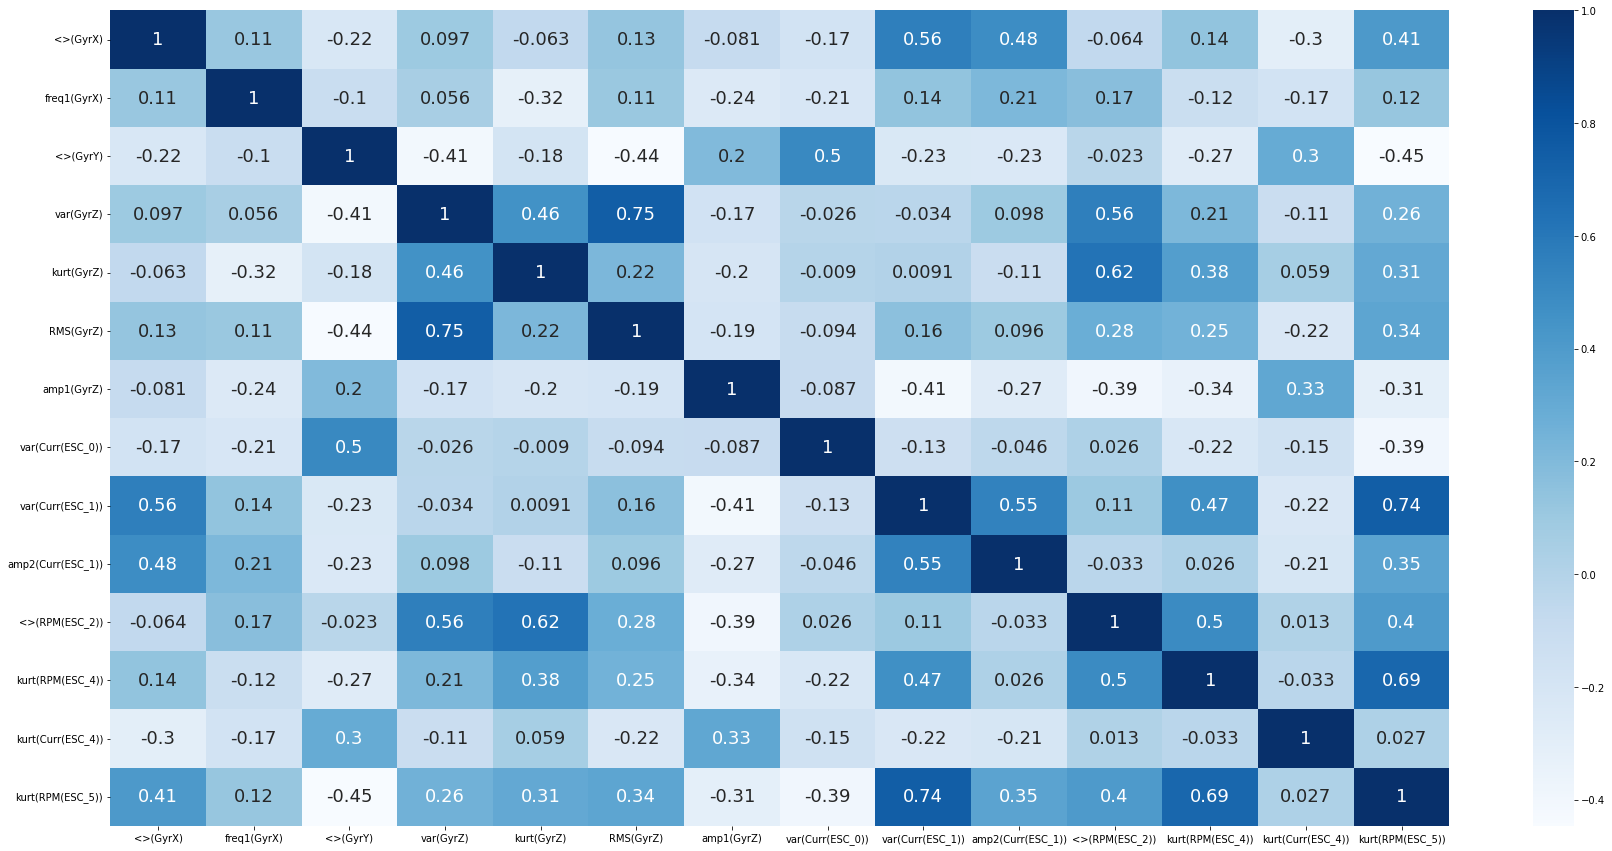

In [21]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [22]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 14)
(325, 14)
(1298, 1)
(325, 1)


In [23]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [1.         0.99615385 0.99615385 1.         1.        ]
Accuracy: 1.0 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64


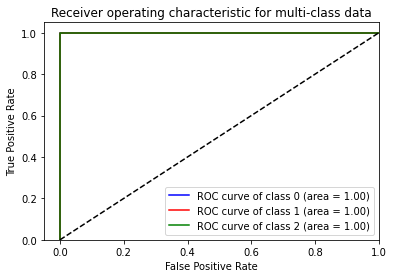

----------------------------------------------------
Cross-Validation: [1.         0.99615385 1.         1.         1.        ]
Accuracy: 1.0 	 ---> DecisionTreeClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


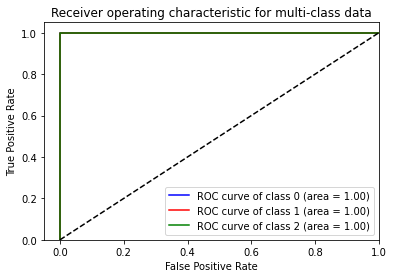

----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> RandomForestClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


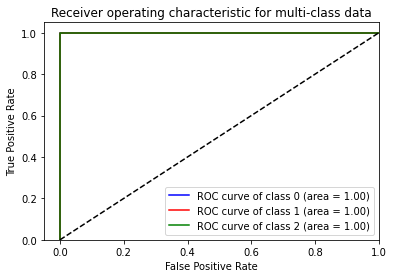

----------------------------------------------------
Cross-Validation: [1.         0.99615385 1.         1.         1.        ]
Accuracy: 1.0 	 ---> GradientBoostingClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


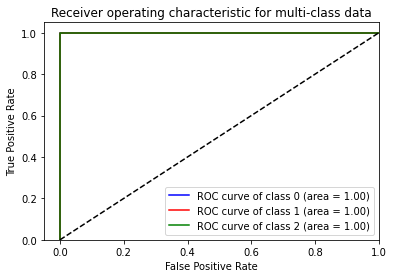

----------------------------------------------------
Cross-Validation: [1.       1.       1.       1.       0.996139]
Accuracy: 1.0 	 ---> AdaBoostClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


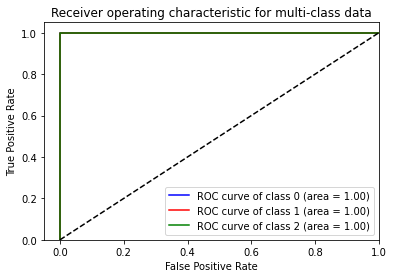

----------------------------------------------------
Cross-Validation: [0.99615385 0.96153846 0.97692308 0.97683398 0.996139  ]
Accuracy: 0.99 	 ---> LinearDiscriminantAnalysis 
Test: 0    1
Name: Guasto_test, dtype: int64


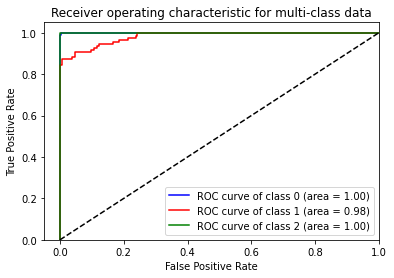

----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> SVC 
Test: 0    1
Name: Guasto_test, dtype: int64


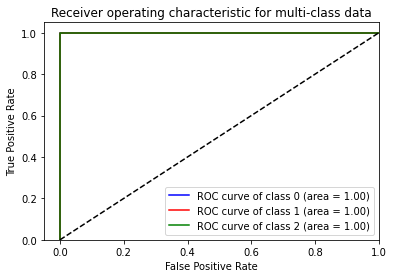

----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> MLPClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


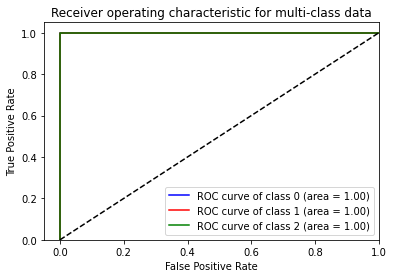

----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> SGDClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


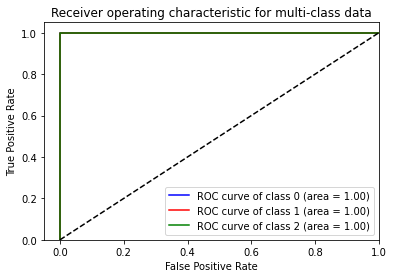

----------------------------------------------------


In [24]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1) | (j == 2) |(j == 7):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

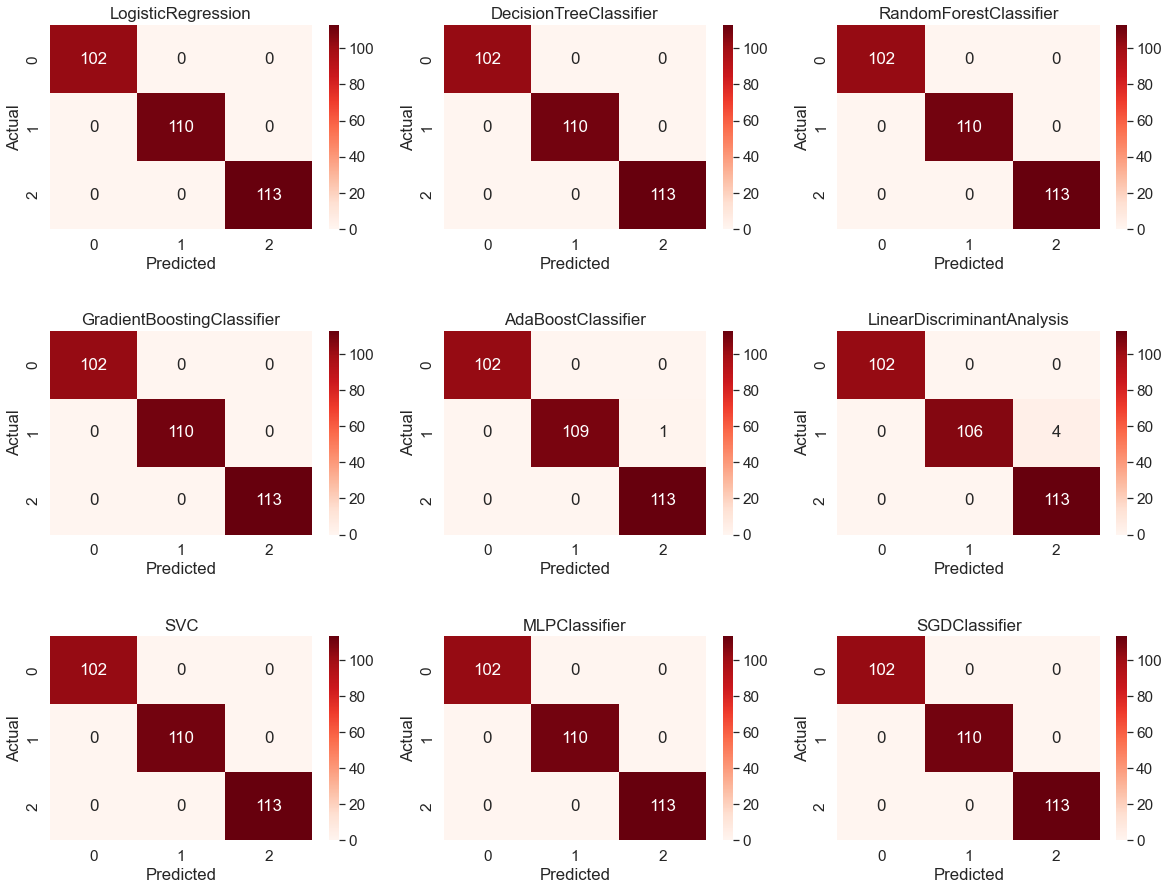

In [25]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

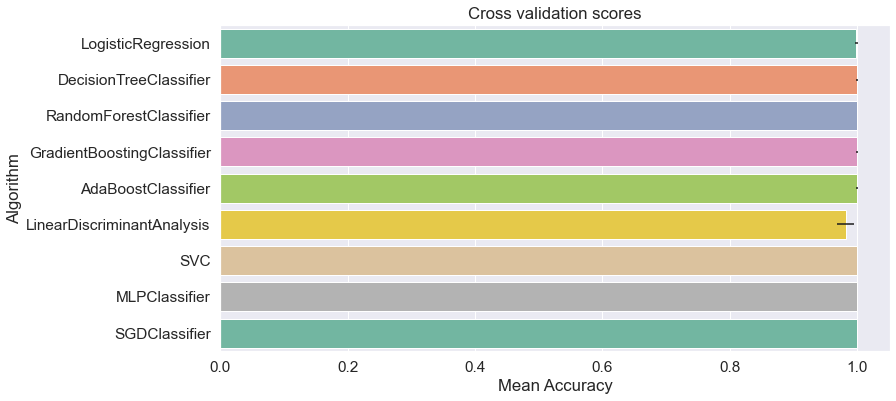

In [26]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [27]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       113

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       113

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      